In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [3]:
#importing data 

sales= pd.read_csv('C:/Users/Lenovo/Downloads/project/Amazon Sales data.csv')
sales.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [4]:
sales.shape

(100, 14)

it means we have 100 rows and 14 columns in the dataset provided.

In [5]:
#getting column names 
sales.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [6]:
#getting basic information about the dataset 
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


it shows the names and datatypes of the columns present in the dataset 


In [7]:
#checking for any missing values 
sales.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

this shows that the dataset is not having any missing value or NaN value in any of the columns 


In [8]:
 #dropping the columns that does not have integer or float values 
 salescheck = sales.drop(['Region','Country','Item Type','Sales Channel','Order Priority','Order Date','Order ID','Ship Date'],axis=1)


<Axes: >

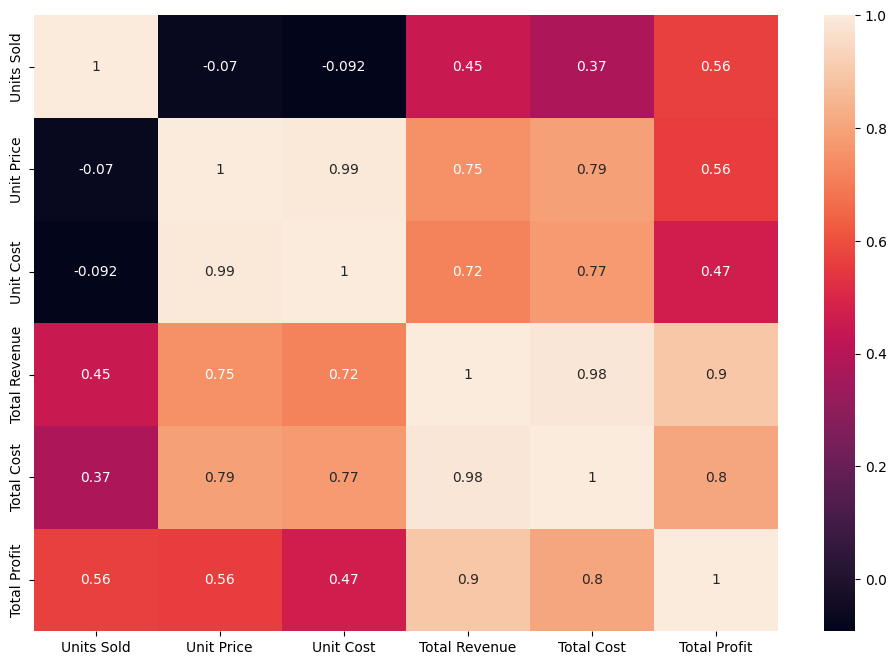

In [9]:
#plotting a heatmap and checking the correlation 

plt.figure(figsize=(12,8))
sns.heatmap(salescheck.corr(),annot=True)

this gives us many observations as 
- total revenue is highly related to total cost 
- unit sold is not related to unit cost
- unit cost is also highly related with unit price 


In [10]:
sales['Ship Date']=pd.to_datetime(sales['Ship Date'])

In [11]:
sales.describe()

,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,2013-10-09 22:48:00,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
min,1.146066e+08,2010-02-25 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2012-02-24 18:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,2013-08-11 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,2015-04-28 00:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,2017-06-17 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06
std,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05


In [12]:
sales =sales.groupby(['Ship Date'])[['Item Type','Total Profit','Unit Cost','Unit Price','Units Sold', 'Total Cost','Total Revenue']].sum()
sales= sales.sort_values(by='Ship Date')
sales.head(25)

,Item Type,Total Profit,Unit Cost,Unit Price,Units Sold,Total Cost,Total Revenue
Ship Date,,,,,,,
2010-02-25,Cosmetics,1257775.58,263.33,437.20,7234,1904929.22,3162704.80
2010-03-18,Clothes,166635.36,35.84,109.28,2269,81320.96,247956.32
2010-05-10,Fruits,14031.02,6.92,9.33,5822,40288.24,54319.26
2010-06-27,Baby Food,951410.50,159.42,255.28,9925,1582243.50,2533654.00
2010-08-01,Clothes,727423.20,35.84,109.28,9905,354995.20,1082418.40
2010-11-17,ClothesOffice Supplies,1495392.79,560.80,760.49,14403,4569540.96,6064933.75
2010-12-25,Cosmetics,1375311.70,263.33,437.20,7910,2082940.30,3458252.00
2011-01-05,Snacks,225246.90,97.44,152.58,4085,398042.40,623289.30
2011-01-20,Household,634745.90,502.54,668.27,3830,1924728.20,2559474.10


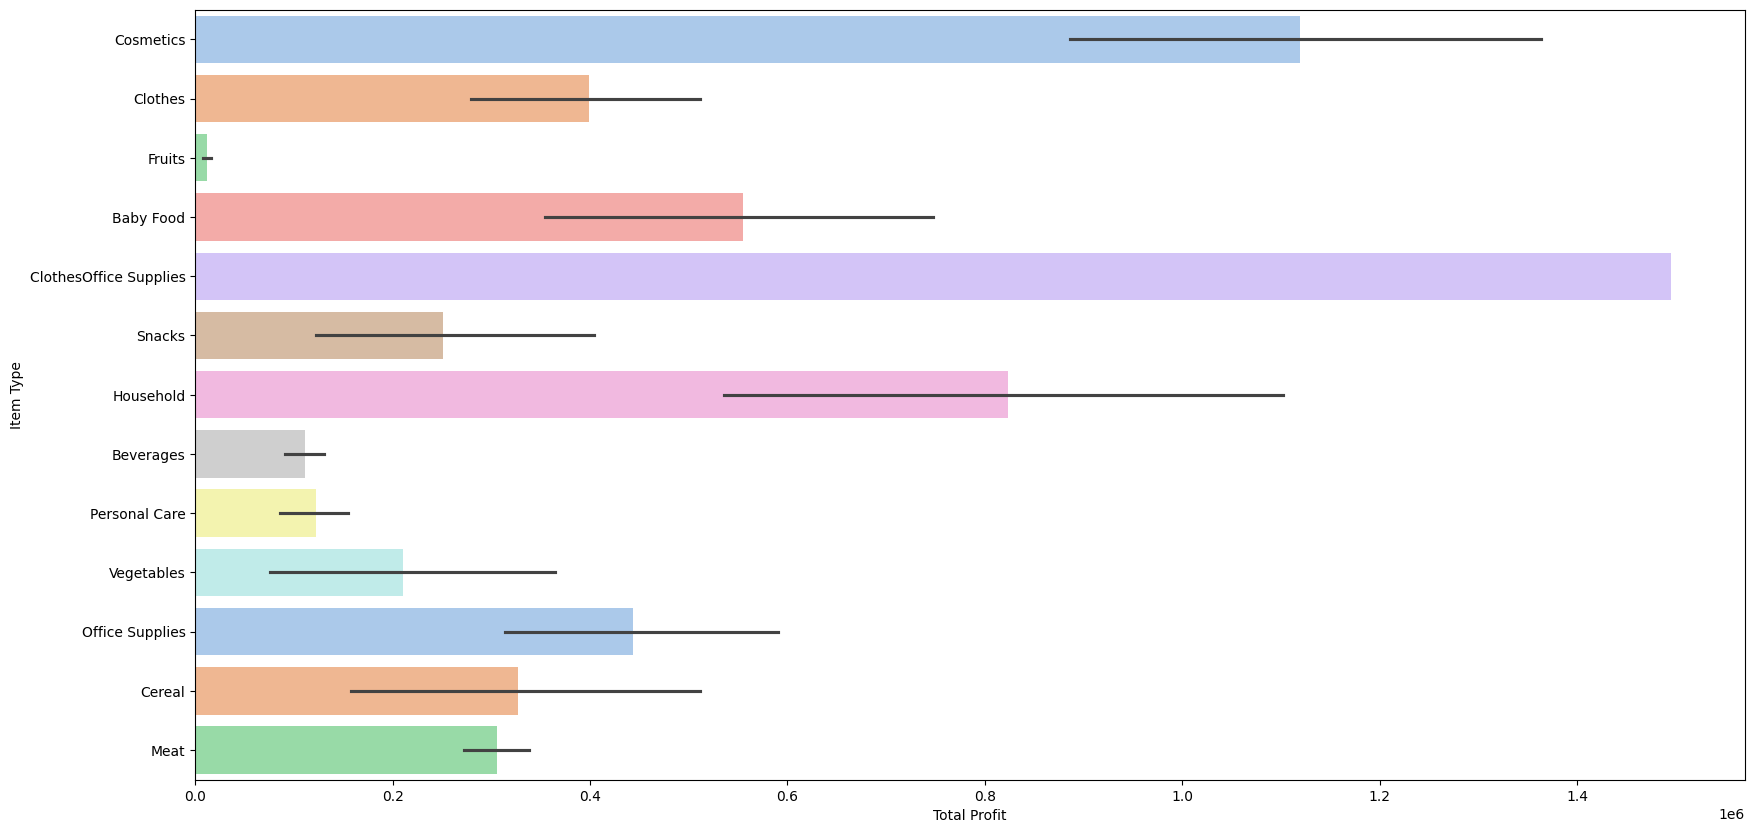

In [13]:
#seeing the relation between 'item type' and 'total profit' generated by that item 
plt.figure(figsize=(20,10))
sns.barplot(y='Item Type', x='Total Profit', data=sales, palette='pastel' )
plt.show()

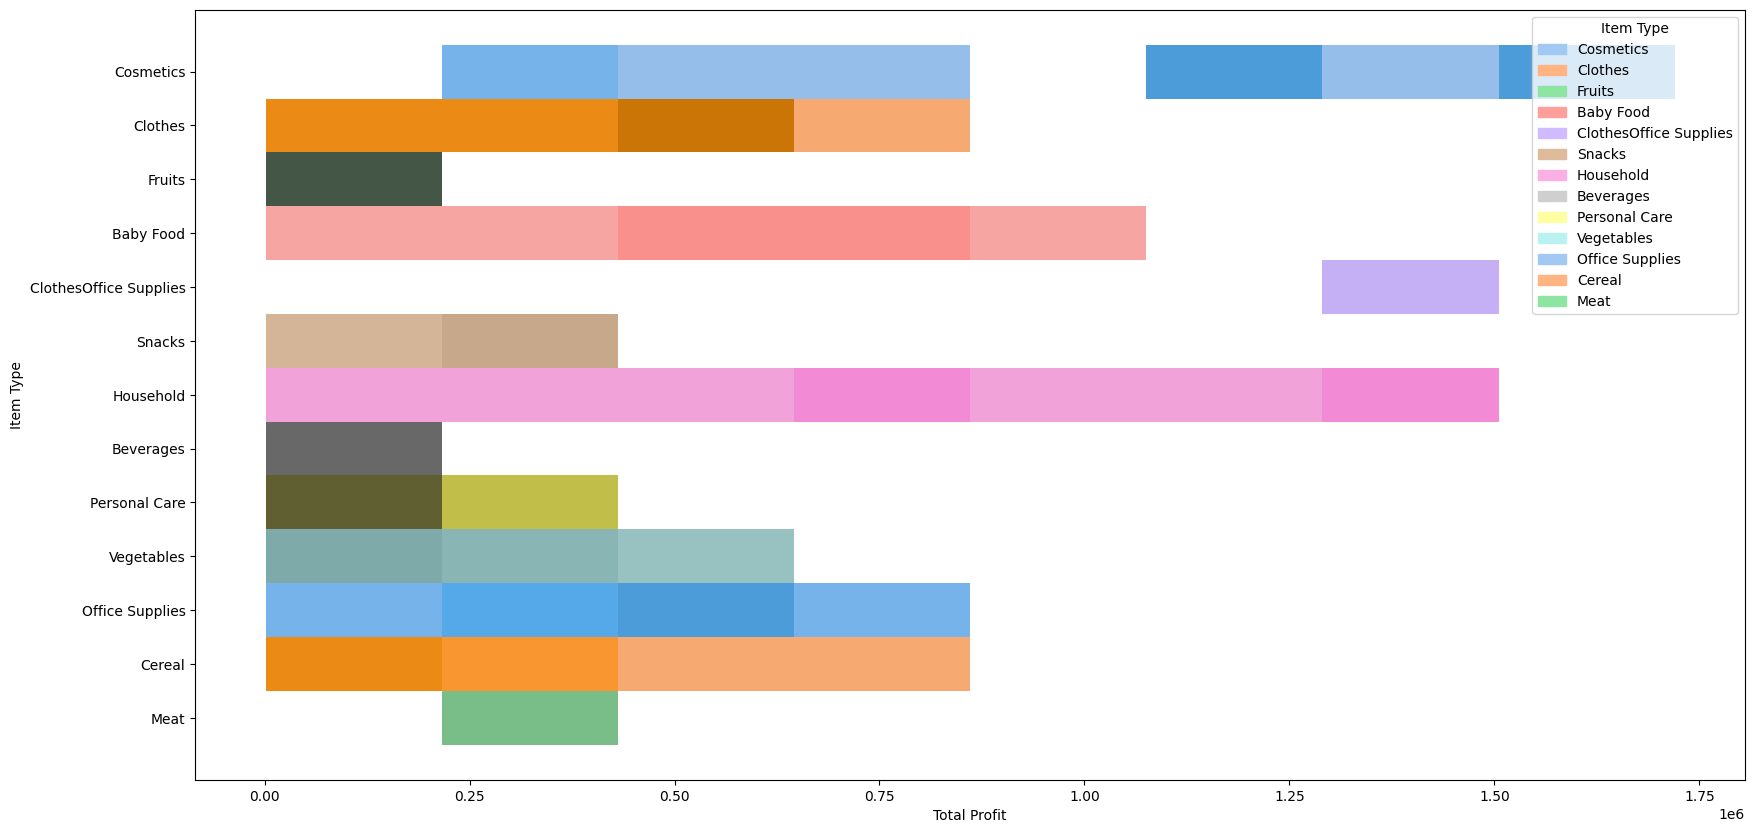

In [14]:
plt.figure(figsize=(20,10))
sns.histplot(y='Item Type', x='Total Profit', data=sales, palette='pastel', hue="Item Type")
plt.show()

<Figure size 1000x1000 with 0 Axes>

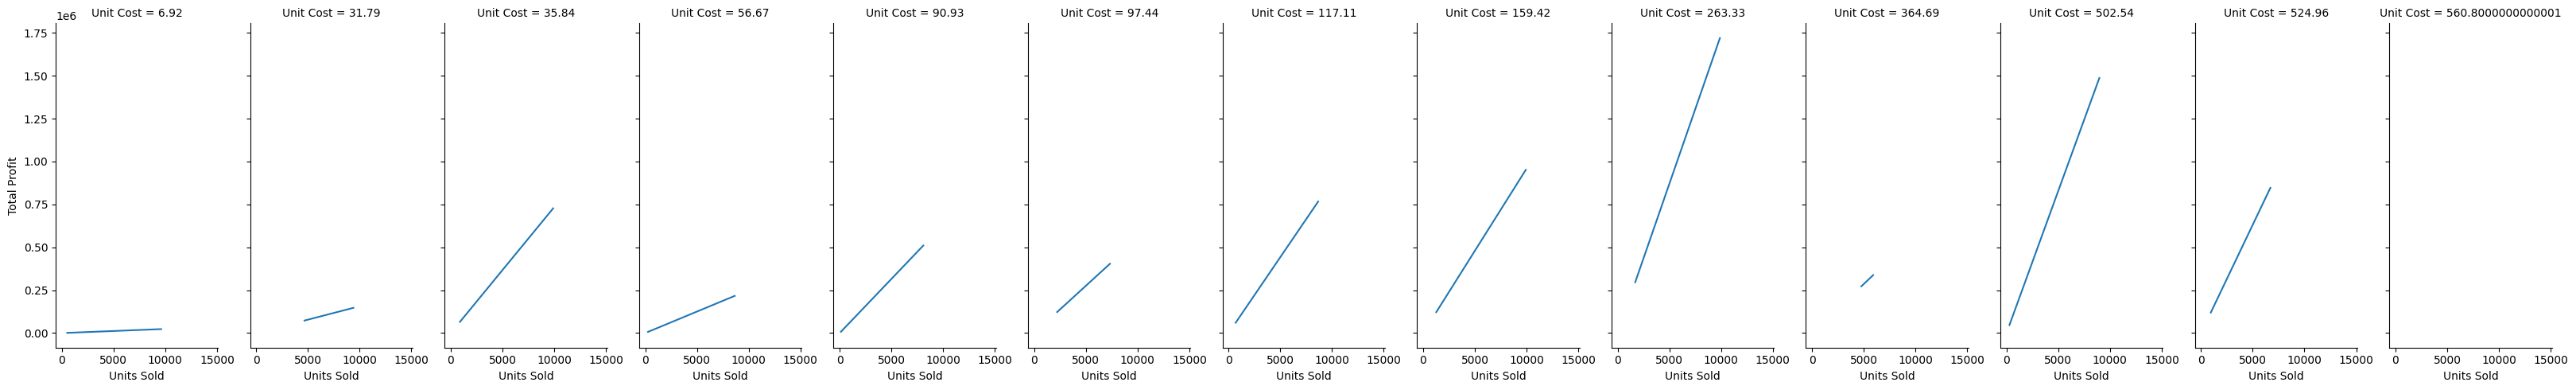

In [15]:
plt.figure( figsize= (10,10))
sns.relplot(x='Units Sold', y='Total Profit', data=sales, height=5, kind='line', aspect=0.5, col= 'Unit Cost', palette='muted')

<Axes: xlabel='Total Revenue', ylabel='Count'>

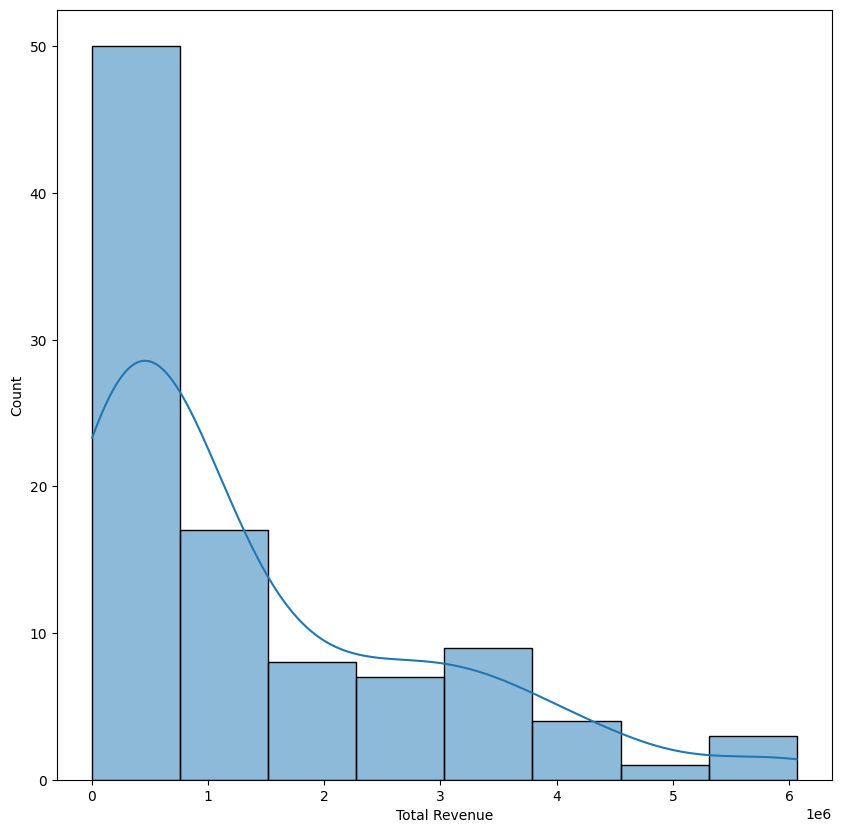

In [16]:
plt.figure( figsize= (10,10))
sns.histplot(sales['Total Revenue'], kde=True)

<Axes: xlabel='Item Type', ylabel='Unit Cost'>

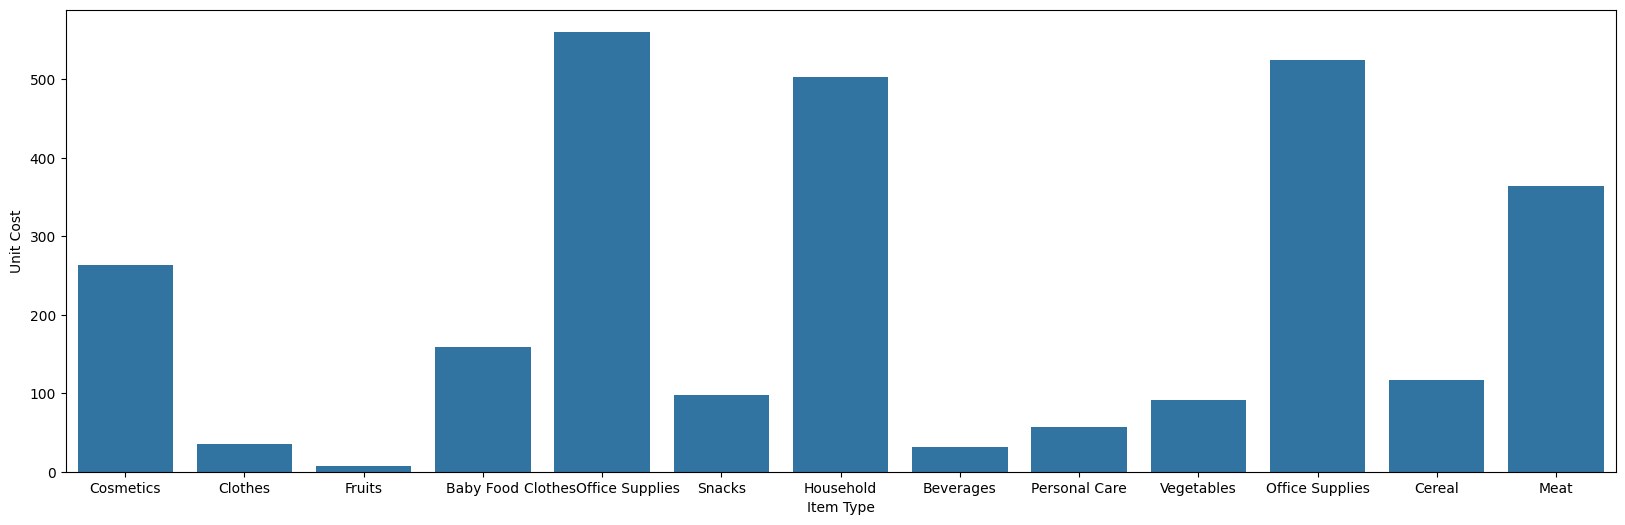

In [17]:
plt.figure(figsize=(20,6))
sns.barplot(y='Unit Cost', x='Item Type', data=sales, )


<Axes: xlabel='Unit Cost', ylabel='Unit Price'>

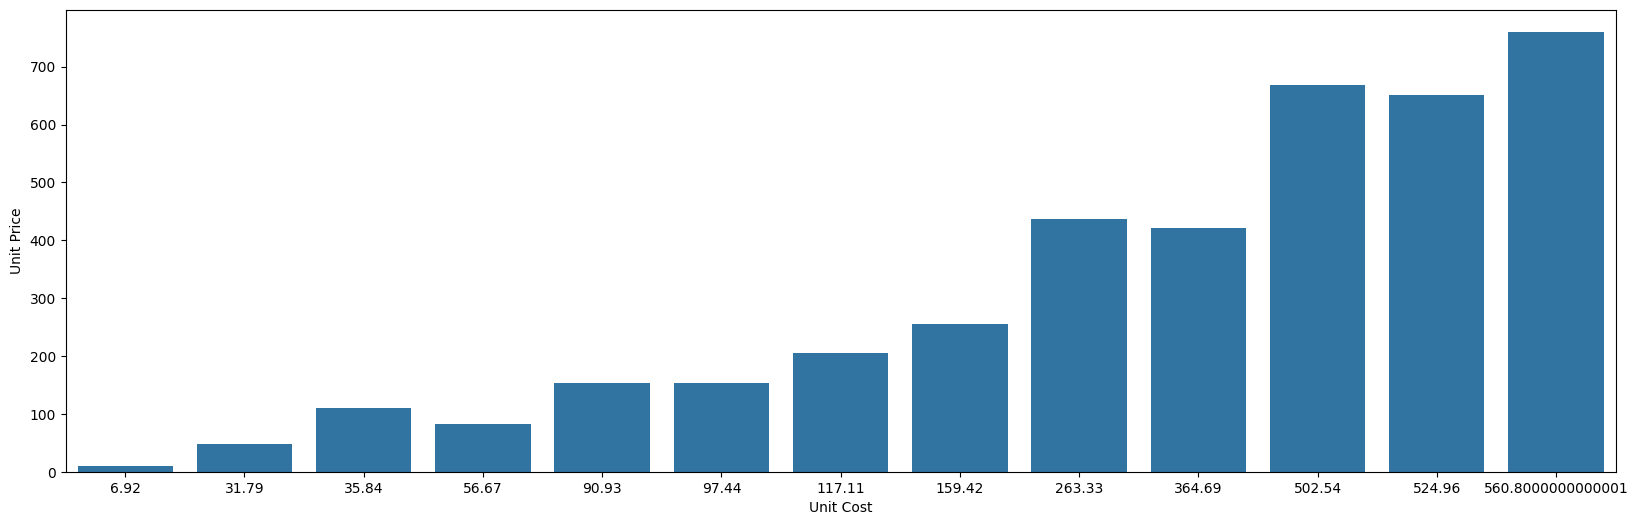

In [18]:
plt.figure(figsize=(20,6))
sns.barplot(y='Unit Price', x='Unit Cost', data=sales, )